## <h1>Lesson 2. Regression analysis: How Much Is Your Car Worth?</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/Kelley_Blue_Book_Vertical.JPG/152px-Kelley_Blue_Book_Vertical.JPG" style="height:200px;">
  
  <p>This exercise will use data collected from <a href="https://www.kbb.com/">Kelly Blue Book</a> for 2005 for used General Motors (GM) cars. The overall goal is to predict the suggested retail price of the car (<a href="http://ww2.amstat.org/publications/jse/jse_data_archive.htm">Kuiper (2008), JSE</a>).</p>

<p>The following features are available for this dataset:</p>
<ul>
<li>Price: Suggested retail price of the used 2005 GM car</li>
<li>Mileage: Car mileage</li>
<li>Cylinder: Number of cylinders in the engine</li>
<li>Doors: Number of doors</li>
<li>Cruise: Does it have cruise control</li>
<li>Sound: Does it have upgraded sound?</li>
<li>Leather: Does it have leather seats?</li>
<li>Make columns (indicator variables):
    <ul>
        <li>Buick</li>
        <li>Cadillac</li>
        <li>Chevy</li>
        <li>Pontiac</li>
        <li>Saab</li>
        <li>...</li>
    </ul>
</li>
<li>Body Type columns (indicator variables):
    <ul>
        <li>convertible</li>
        <li>coupe</li>
        <li>hatchback</li>
        <li>sedan</li>
        <li>...</li>
    </ul>
</li>
</ul>


In [82]:
import pandas as pd
import numpy as np

cars = pd.read_csv('cars.csv')
cars.head()

,Price,Mileage,Cylinder,Doors,Cruise,Sound,Leather,Buick,Cadillac,Chevy,Pontiac,Saab,Saturn,convertible,coupe,hatchback,sedan,wagon
0,22661.05,20105,6,4,1,0,0,1,0,0,0,0,0,0,0,0,1,0
1,21725.01,13457,6,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0
2,29142.71,31655,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0
3,30731.94,22479,4,2,1,0,0,0,0,0,0,1,0,1,0,0,0,0
4,33358.77,17590,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0


In [2]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 18 columns):
Price          804 non-null float64
Mileage        804 non-null int64
Cylinder       804 non-null int64
Doors          804 non-null int64
Cruise         804 non-null int64
Sound          804 non-null int64
Leather        804 non-null int64
Buick          804 non-null int64
Cadillac       804 non-null int64
Chevy          804 non-null int64
Pontiac        804 non-null int64
Saab           804 non-null int64
Saturn         804 non-null int64
convertible    804 non-null int64
coupe          804 non-null int64
hatchback      804 non-null int64
sedan          804 non-null int64
wagon          804 non-null int64
dtypes: float64(1), int64(17)
memory usage: 113.1 KB


<h3>Q.1. Plot Price vs. Mileage. From the plot, does it seem like cars with more mileage are worth less?</h3>

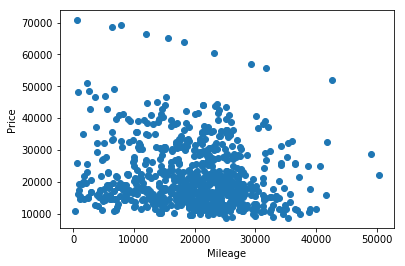

In [62]:
# Put the command (or commands) here that would give answer to the above question.
import matplotlib.pyplot as plt

plt.scatter(cars.Mileage,cars.Price)
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

#### It appears that there is a relationship between mileage and price, especially at higher price ranges

<h3>Q.2. Develop a simple linear regression model, relating price with mileage only. Show summary statistics for the model.</h3> 

In [99]:
# Linear regression model:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

X = cars.Mileage.values.reshape(-1,1)
y = cars.Price.values.reshape(-1,1)

mod = LinearRegression().fit(X,y)
y_pred = mod.predict(X)



# Show summary statistics for the model:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(X[:,0],y[:,0])

print("Intercept: ",intercept.round(2))
print("Coefficient of mileage:",slope.round(3))
print("R^2:",r_value.round(2))
print("P-value:",p_value.round(2))
print("MSE:",metrics.mean_squared_error(y,y_pred).round(2))
print("Std Err:",std_err.round(2))

Intercept:  24764.56
Coefficient of mileage: -0.173
R^2: -0.14
P-value: 0.0
MSE: 95591781.67
Std Err: 0.04


<h3>Q.3. What happens to price when there is one more mile on the car?</h3>

In [100]:
# Command:
print("Coefficient of mileage:",slope.round(3))
# One sentence summary:
print("")
print("When mileage increases by one unit, price changes by ${}".format(slope.round(3)))

Coefficient of mileage: -0.173

When mileage increases by one unit, price changes by $-0.173


<h3>Q.4. What is the expected value of a car with 0 miles according to your model?</h3>

In [101]:
# Single command
print("Intercept (car with zero miles): ${}".format(intercept.round(2)))

Intercept (car with zero miles): $24764.56


<h3>Q.5. Plot residuals of the model vs. fitted values. Are there any problems that you see with the model?</h3>

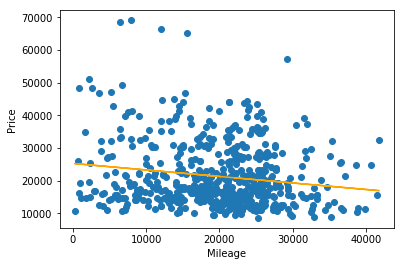

In [74]:
# Plot residuals
plt.scatter(X_train,y_train)
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.plot(X_train,y_pred,color='orange')
plt.show()
# Explain whether there are any problems (1-2 sentence)
#

<h3>Q.6. Develop a model that predicts the Price from Mileage, Cylinder, Doors, Cruise, Sound, Leather data. Is this model more accurate - explain why (1-2 sentence). </h3>

In [ ]:
# Commands:

# Explanation:
# 

<h3>Q.7. Are any of the features in the above model highly colinear to the point where they impact the model quality?</h3>

In [ ]:
# Command(s):

# Comment on the result


<h3>Q.8. What is the expected price for the Chevy sedan described in variable 'chevy', shown below?</h3>

In [ ]:
chevy = c("Mileage"=30000, "Cylinder"=4, "Doors"=2, "Cruise"=1, "Sound"=1, "Leather"=1)
# Commands that estimate the price of 'chevy' using the model with 6 predictors


<h3>Q.9. What is the expected price for the Chevy mentioned above if you include all features in the prediction? Can you comment on any problems you encounter when doing this prediction?</h3>

In [ ]:
# Commands

# Comments on problems
#